In [246]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde
import seaborn as sns
import scipy

In [247]:
mu = 10
std = 3
num_samples = 30000
population = np.random.normal(mu, std, num_samples)

In [248]:
observation = population[np.random.randint(0, 30000, 1000)]

(10.046284923276268, 3.0424405883919152)

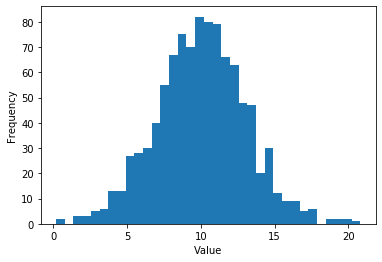

In [249]:
plt.hist(observation, bins=35)
plt.xlabel('Value')
plt.ylabel('Frequency')
obs_mu = observation.mean()
obs_mu, observation.std()

# MCMC - Metropolis Hastings for std estimation

In [250]:
def transition_model(x):
    return [x[0], np.random.normal(x[1], 0.5, 1).item()]

def prior(x):
    # x[0] = mu, x[1] = sigma (new or current)
    # log(1) = 0 --> for simple calculation
    if(x[1] <= 0):
        return 0
    return 1

def manual_log_like_normal(x, data):
    # x[0] = mu, x[1] = sigma (new or current)
    # data = the observation
    # derived from accept ratio's likelihood term
    
    return np.sum(-np.log(x[1]*np.sqrt(2*np.pi)) - ((data - x[0])**2) / (2 * x[1]**2 ) )


def acceptance(x, x_new):
    # x_new = numerator of acceptance ratio
    # x = denominator of acceptance ratio
    if x_new > x:
        return True
    else:
        accept=np.random.uniform(0,1)
        return (accept < np.exp(x_new-x))
    
def metropolis_hastings(likelihood_computer, prior, transision_model, param_init, iterations, data, acceptance_rule):
    # likelihood_computer = return likelihood of observation data
    # transition_model = draw a sample form a symmetric distribution (detailed balance..?)
    # pram_init = strating sample
    # iterations = number of accepted to generated
    # data = the data we wish to model
    # acceptance_rule = decides whether to accept or reject the new sample
    
    x = param_init
    accepted = []
    rejected = []
    for i in range(iterations):
        x_new = transition_model(x)
        x_like = likelihood_computer(x, data)
        x_new_like = likelihood_computer(x_new, data)
        
        if acceptance_rule(x_like + np.log(prior(x)), x_new_like+np.log(prior(x_new))):
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)
            
    return np.array(accepted), np.array(rejected)

In [251]:
accepted, rejected = metropolis_hastings(manual_log_like_normal, prior, transition_model, [obs_mu, 0.1], 50000, observation, acceptance)

Accepted std mean : 3.0455342041899485


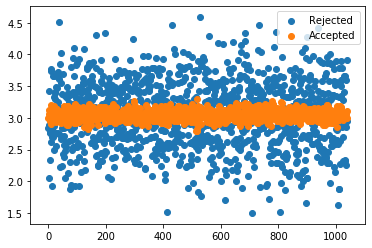

In [254]:
print('Accepted std mean :', accepted[:, 1].mean())

num_accepted = len(accepted)
# drop first 25% data (burn-in)
plt.scatter(np.arange(num_accepted-7500), rejected[:, 1][7500:num_accepted], label='Rejected')
plt.scatter(np.arange(num_accepted-7500), accepted[:, 1][7500:], label='Accepted')
plt.legend()
plt.show()

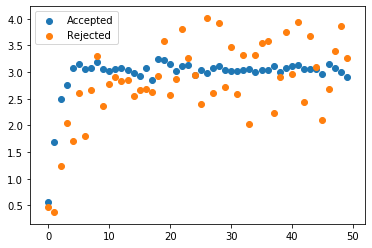

In [253]:
plt.scatter(np.arange(50), accepted[:,1][:50], label='Accepted')
plt.scatter(np.arange(50), rejected[:,1][:50], label='Rejected')
plt.legend()
plt.show()

# Population's sample vs MCMC pred samples

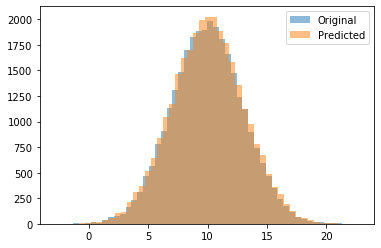

In [270]:
pred_samples = np.random.normal(obs_mu, accepted[:, 1][7500:].mean(), 30000)

plt.hist(population, bins=50, alpha=0.5, label='Original')
plt.hist(pred_samples, bins=50, alpha=0.5, label='Predicted')
plt.legend()
plt.show()